In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os as os
import cv2
import random 
import pickle

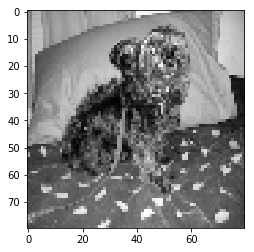

In [2]:
DATADIR = "D:\PetImages"
CATEGORIES = [ "Dog" , "Cat" ]
pixels = 80
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to cat or dog directory
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        resize_array = cv2.resize(img_array, (pixels, pixels))
        plt.imshow(resize_array,cmap="gray" )
        plt.show()
        break
    break

In [3]:
training_data = []

DATADIR = "D:\PetImages"
CATEGORIES = [ "Dog" , "Cat" ]
pixels = 80

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to cat or dog directory
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                resize_array = cv2.resize(img_array, (pixels, pixels))
            
                training_data.append([resize_array, class_num])
            except Exception as e:
                pass
            
create_training_data()
random.shuffle(training_data)
    

In [53]:
print(len(training_data))
for sample in training_data[:10]:
    print(sample[1])

24946
1
0
0
0
1
0
0
0
0
0


In [4]:
X = []
Y = []
for features, label in training_data:
    X.append(features)
    Y.append(label)
X = np.array(X).reshape(-1, pixels, pixels, 1)

In [5]:
pickle_out = open("X.pickle" , "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle" , "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [6]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)